In [1]:
import torch as T
import torchvision.models as models
import torchvision.transforms as transforms

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
resnet = models.resnet50(pretrained=True).cuda()
_ = resnet.eval()

vgg = models.vgg16(pretrained=True).cuda()
_ = vgg.eval()

In [3]:
trs1 = transforms.Compose([transforms.RandomResizedCrop(224), 
                           transforms.ToTensor(), 
                           transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                std=[0.229, 0.224, 0.225])])

trs2 = transforms.Compose([transforms.RandomResizedCrop(224), 
                           transforms.ToTensor()])

In [4]:
# class list
# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

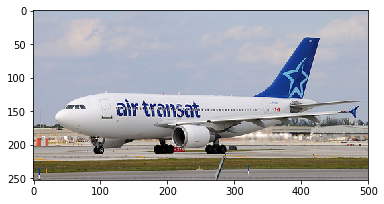

W/ Normalization: ResNet: 404, VGG: 404
W/O Normalization: ResNet: 404, VGG: 404


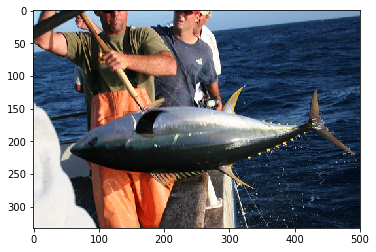

W/ Normalization: ResNet: 395, VGG: 587
W/O Normalization: ResNet: 394, VGG: 394


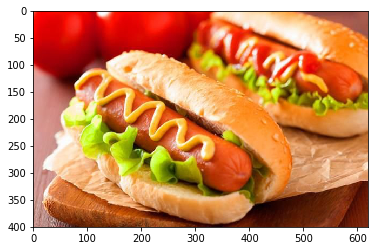

W/ Normalization: ResNet: 934, VGG: 934
W/O Normalization: ResNet: 934, VGG: 934


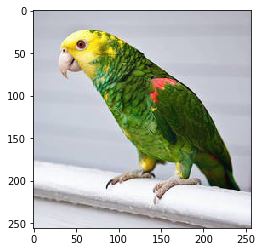

W/ Normalization: ResNet: 90, VGG: 90
W/O Normalization: ResNet: 601, VGG: 452


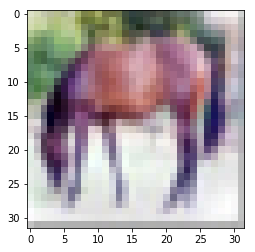

W/ Normalization: ResNet: 339, VGG: 339
W/O Normalization: ResNet: 680, VGG: 906


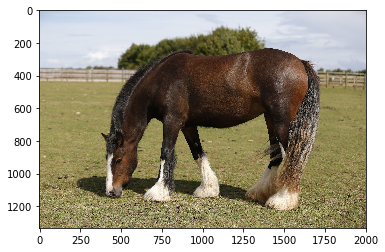

W/ Normalization: ResNet: 339, VGG: 339
W/O Normalization: ResNet: 246, VGG: 176


In [5]:
def run_model(model, img, trs):
    inp = trs(img)
    inp = inp.view((1, )+tuple(inp.shape))
    inp = inp.cuda()
    
    out = model(inp)
    out = out.detach().cpu().numpy()
    
    return out

N = 6
for i in range(1, N+1):
    img = Image.open('%d.jpg'%(i))
    
    plt.figure()
    plt.imshow(img)
    plt.show()
    
    out_res1 = run_model(resnet, img, trs1)
    out_res2 = run_model(resnet, img, trs2)
    out_vgg1 = run_model(vgg, img, trs1)
    out_vgg2 = run_model(vgg, img, trs2)
    
    print('W/ Normalization: ResNet: %d, VGG: %d' % (np.argmax(out_res1, 1)[0], np.argmax(out_vgg1, 1)[0]))
    print('W/O Normalization: ResNet: %d, VGG: %d' % (np.argmax(out_res2, 1)[0], np.argmax(out_vgg2, 1)[0]))